In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from nn_magnetics.dataset import get_data_parallel, ChiMode
from nn_magnetics.model import Network
from nn_magnetics.plotting import plot_histograms, plot_heatmaps


In [3]:
DEVICE = "cpu"

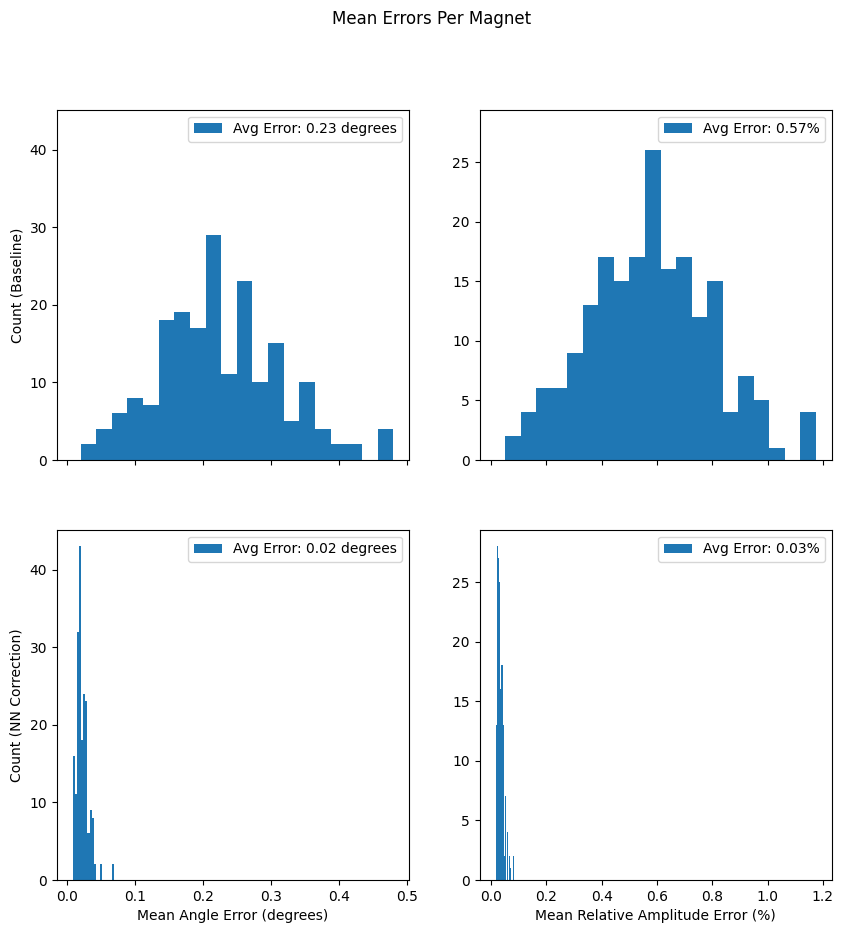

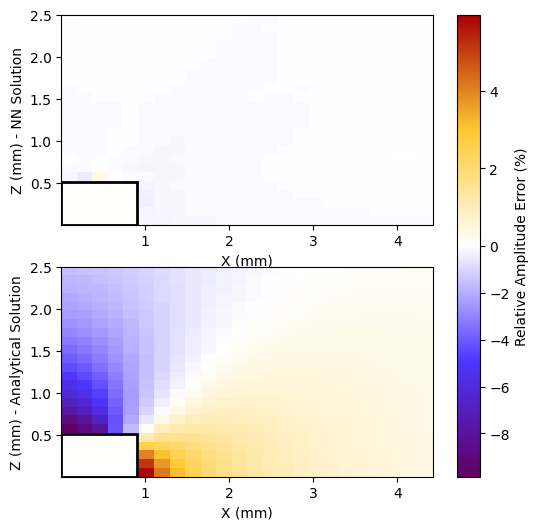

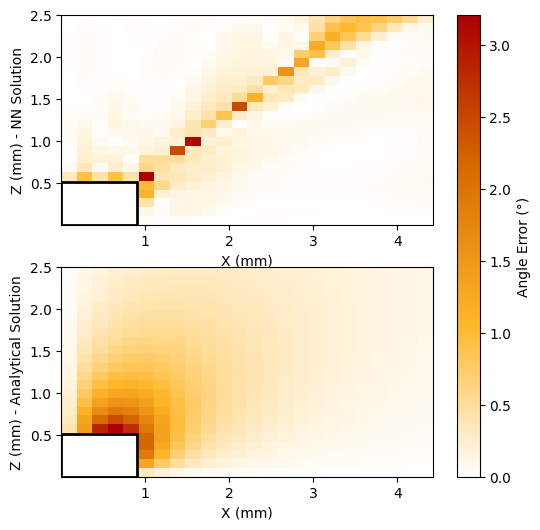

In [4]:
X_test, B_test = get_data_parallel(
    "../data/anisotropic_chi/test_anisotropic",
    ChiMode.ANISOTROPIC,
)

model = Network(
    in_features=7,
    hidden_dim_factor=6,
    out_features=3,
).to(DEVICE, dtype=torch.float64)

model.load_state_dict(
    torch.load(
        "../results/anisotropic_chi_v2/golden-deluge-10/weights.pt",
        weights_only=True,
    )
)

plot_histograms(
    X_test=X_test,
    B_test=B_test,
    model=model,
    save_path="../results/anisotropic_chi_v2/golden-deluge-10",
    show_plot=False,
    tag="anisotropic",
)

plot_heatmaps(
    model=model,
    save_path="../results/anisotropic_chi_v2/golden-deluge-10",
    tag="anisotropic",
    chi_mode=ChiMode.ANISOTROPIC,
    eval_path="../data/anisotropic_chi/test_anisotropic/data_1.npz",
)